## Problem for Covid - 19 Data Analysis Project using Python


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Import the dataset using Pandas from above mentioned url.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


### 2. High Level Data Understanding:
- a. Find no. of rows & columns in the dataset
- b. Data types of columns.
- c. Info & describe of data in dataframe.

In [3]:
df.shape

(57394, 49)

In [4]:
df.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

In [6]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.375800e+04,56465.000000,55652.000000,4.436800e+04,56465.000000,55652.000000,53471.000000,56401.000000,55587.000000,44096.000000,...,50367.000000,33571.000000,51013.000000,52881.000000,39669.000000,39156.000000,24176.000000,45936.000000,56336.000000,49247.000000
mean,1.677974e+05,1953.576941,1920.431953,6.858639e+03,47.054317,46.835439,3139.099982,39.344804,38.403211,95.335293,...,20620.172071,12.435453,252.646642,8.070269,10.741569,32.642686,52.089636,3.089724,73.937780,0.722223
std,1.693038e+06,18269.650340,17777.391785,5.578081e+04,390.853776,378.272794,6183.455260,133.985155,101.649441,180.721699,...,20310.999832,19.427924,117.522344,4.189605,10.470743,13.453566,31.645306,2.513193,7.397016,0.153261
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.800000e+02,0.000000,0.857000,1.300000e+01,0.000000,0.000000,90.033000,0.000000,0.260000,3.977750,...,5321.444000,0.500000,156.139000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,2.070000e+03,14.000000,19.429000,8.400000e+01,0.000000,0.286000,593.663000,2.194000,3.863000,20.383000,...,13913.839000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.345000,0.752000
75%,2.235675e+04,235.000000,245.286000,7.270000e+02,4.000000,4.000000,3487.050000,25.941000,29.678500,90.571250,...,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000
max,5.515465e+07,646281.000000,584981.857000,1.328537e+06,10600.000000,9027.714000,76541.772000,8652.658000,2472.188000,1248.014000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


### 3. Low Level Data Understanding :
- a. Find count of unique values in location column.
- b. Find which continent has maximum frequency using values counts.
- c. Find maximum & mean value in 'total_cases'.
- d. Find 25%,50% & 75% quartile value in 'total_deaths'.
- e. Find which continent has maximum 'human_development_index'.
- f. Find which continent has minimum 'gdp_per_capita'.

In [7]:
df['location'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faeroe Islands', 'Falkland Isla

In [8]:
df['location'].nunique()

216

In [9]:
df['continent'].value_counts().idxmax()

'Europe'

In [10]:
df['total_cases'].mean()

167797.3688753302

In [11]:
df['total_cases'].max()

55154651.0

In [12]:
df['total_deaths'].quantile([0.25,0.5,0.75])

0.25     13.0
0.50     84.0
0.75    727.0
Name: total_deaths, dtype: float64

In [13]:
df.groupby('continent').agg({'human_development_index':'max'})

,human_development_index
continent,
Africa,0.797
Asia,0.933
Europe,0.953
North America,0.926
Oceania,0.939
South America,0.843


In [14]:
df.loc[df.groupby('continent')['human_development_index'].idxmax()]['continent'].values[0]

'Africa'

In [15]:
df.loc[df.groupby('continent')['gdp_per_capita'].idxmin()]['continent']

10259           Africa
56040             Asia
34054           Europe
22859    North America
46810          Oceania
6367     South America
Name: continent, dtype: object

In [16]:
df.loc[df.groupby('continent')['gdp_per_capita'].idxmin()]['continent'].values[0]

'Africa'

### 4. Filter the dataframe with only this columns
- ['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index'] and update the data frame.

In [17]:
filtered_df = df[['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index']]
filtered_df.head()


,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498


### 5. Data Cleaning
- a. Remove all duplicates observations
- b. Find missing values in all columns
- c. Remove all observations where continent column value is missing (Tip : using subset parameter in dropna)
- d. Fill all missing values with 0

In [18]:
df.drop_duplicates()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57389,NaN,NaN,International,13/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57390,NaN,NaN,International,14/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57391,NaN,NaN,International,15/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57392,NaN,NaN,International,16/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.isnull().sum()

iso_code                                323
continent                               646
location                                  0
date                                      0
total_cases                            3636
new_cases                               929
new_cases_smoothed                     1742
total_deaths                          13026
new_deaths                              929
new_deaths_smoothed                    1742
total_cases_per_million                3923
new_cases_per_million                   993
new_cases_smoothed_per_million         1807
total_deaths_per_million              13298
new_deaths_per_million                  993
new_deaths_smoothed_per_million        1807
reproduction_rate                     19698
icu_patients                          52904
icu_patients_per_million              52904
hosp_patients                         52389
hosp_patients_per_million             52389
weekly_icu_admissions                 57037
weekly_icu_admissions_per_millio

In [20]:
df.dropna(subset=['continent'])

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56743,ZWE,Africa,Zimbabwe,13/11/20,8696.0,29.0,36.000,255.0,0.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56744,ZWE,Africa,Zimbabwe,14/11/20,8765.0,69.0,42.000,257.0,2.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56745,ZWE,Africa,Zimbabwe,15/11/20,8786.0,21.0,41.143,257.0,0.0,0.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56746,ZWE,Africa,Zimbabwe,16/11/20,8786.0,0.0,36.429,257.0,0.0,0.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [21]:
df.fillna(0)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57389,0,0,International,13/11/20,696.0,0.0,0.0,7.0,0.0,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000
57390,0,0,International,14/11/20,696.0,0.0,0.0,7.0,0.0,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000
57391,0,0,International,15/11/20,696.0,0.0,0.0,7.0,0.0,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000
57392,0,0,International,16/11/20,696.0,0.0,0.0,7.0,0.0,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000


### 6. Date time format :
- a. Convert date column in datetime format using pandas.to_datetime
- b. Create new column month after extracting month data from date column.

In [22]:
df['date'] = pd.to_datetime(df['date'])
df['date']

/tmp/ipykernel_8178/3672094586.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


0       2019-12-31
1       2020-01-01
2       2020-02-01
3       2020-03-01
4       2020-04-01
           ...    
57389   2020-11-13
57390   2020-11-14
57391   2020-11-15
57392   2020-11-16
57393   2020-11-17
Name: date, Length: 57394, dtype: datetime64[ns]

In [23]:
df['month'] = df['date'].dt.month
df['month']

0        12
1         1
2         2
3         3
4         4
         ..
57389    11
57390    11
57391    11
57392    11
57393    11
Name: month, Length: 57394, dtype: int32

### 7. Data Aggregation:
- a. Find max value in all columns using groupby function on 'continent'column (Tip: use reset_index() after applying groupby)
- b. Store the result in a new dataframe named 'df_groupby'.

In [24]:
df_groupby = df.groupby('continent').max().reset_index()
df_groupby

,continent,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,month
0,Africa,ZWE,Zimbabwe,2020-12-11,752269.0,13944.0,12583.714,20314.0,572.0,297.429,...,77.6,525.432,22.02,9.7,65.8,89.827,6.30,76.88,0.797,12
1,Asia,YEM,Yemen,2020-12-11,8874290.0,97894.0,93198.571,130519.0,2003.0,1168.000,...,30.3,724.417,17.72,26.9,78.1,98.999,13.05,84.86,0.933,12
2,Europe,VAT,Vatican,2020-12-11,1991233.0,86852.0,54868.571,52147.0,2004.0,1101.000,...,5.7,539.849,10.08,44.0,58.3,97.719,13.80,86.75,0.953,12
3,North America,VIR,United States Virgin Islands,2020-12-11,11205486.0,184813.0,156419.143,247220.0,4928.0,2715.143,...,23.5,430.548,17.11,19.1,53.3,90.650,5.80,83.92,0.926,12
4,Oceania,WLF,Wallis and Futuna,2020-12-11,27750.0,1384.0,551.714,907.0,59.0,22.000,...,25.1,561.494,30.53,23.5,48.8,82.502,3.84,83.44,0.939,12
5,South America,VEN,Venezuela,2020-12-11,5876464.0,69074.0,46393.000,166014.0,3935.0,1096.714,...,7.1,373.159,12.54,34.2,42.9,80.635,5.00,81.44,0.843,12


### 8. Feature Engineering :
- a. Create a new feature 'total_deaths_to_total_cases' by ratio of 'total_deaths' column to 'total_cases'

In [25]:
df_groupby['total_deaths_to_total_cases'] = df_groupby['total_deaths'] / df_groupby['total_cases']
df_groupby

,continent,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,month,total_deaths_to_total_cases
0,Africa,ZWE,Zimbabwe,2020-12-11,752269.0,13944.0,12583.714,20314.0,572.0,297.429,...,525.432,22.02,9.7,65.8,89.827,6.30,76.88,0.797,12,0.027004
1,Asia,YEM,Yemen,2020-12-11,8874290.0,97894.0,93198.571,130519.0,2003.0,1168.000,...,724.417,17.72,26.9,78.1,98.999,13.05,84.86,0.933,12,0.014708
2,Europe,VAT,Vatican,2020-12-11,1991233.0,86852.0,54868.571,52147.0,2004.0,1101.000,...,539.849,10.08,44.0,58.3,97.719,13.80,86.75,0.953,12,0.026188
3,North America,VIR,United States Virgin Islands,2020-12-11,11205486.0,184813.0,156419.143,247220.0,4928.0,2715.143,...,430.548,17.11,19.1,53.3,90.650,5.80,83.92,0.926,12,0.022062
4,Oceania,WLF,Wallis and Futuna,2020-12-11,27750.0,1384.0,551.714,907.0,59.0,22.000,...,561.494,30.53,23.5,48.8,82.502,3.84,83.44,0.939,12,0.032685
5,South America,VEN,Venezuela,2020-12-11,5876464.0,69074.0,46393.000,166014.0,3935.0,1096.714,...,373.159,12.54,34.2,42.9,80.635,5.00,81.44,0.843,12,0.028251


### 9. Data Visualization :
- a. Perform Univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn dist plot.
- b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'.
- c. Plot Pairplot on df_groupby dataset.
- d. Plot a bar plot of 'continent' column with 'total_cases' .

/home/kranthi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


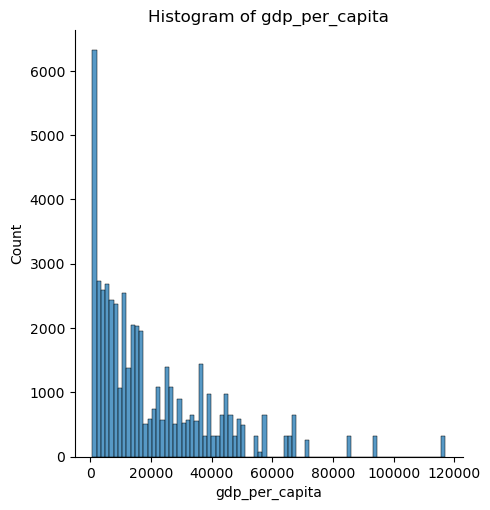

In [26]:
sns.displot(df['gdp_per_capita'])
plt.title('Histogram of gdp_per_capita')
plt.show()

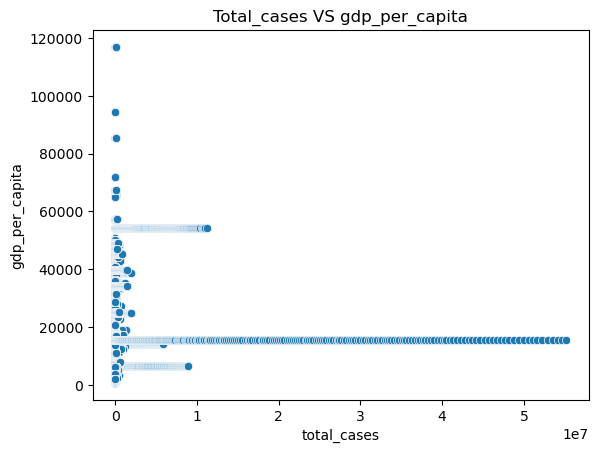

In [27]:
sns.scatterplot(data=df, x='total_cases', y='gdp_per_capita')
plt.title('Total_cases VS gdp_per_capita')
plt.show()

In [28]:
sns.pairplot(df_groupby)

/home/kranthi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


/home/kranthi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


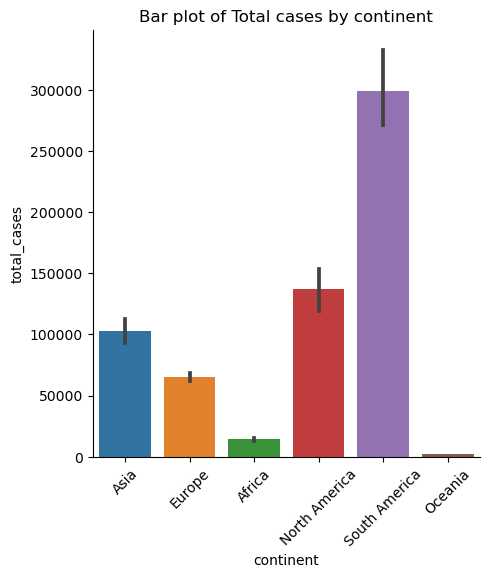

In [30]:
sns.catplot(data=df, x='continent', y='total_cases', kind='bar')
plt.title('Bar plot of Total cases by continent')
plt.xticks(rotation=45)
plt.show()

### 10.Save the df_groupby dataframe in your local drive using pandas.to_csv function.

In [31]:
df_groupby.to_csv('df_groupby.csv', index=False)